In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'file_path' with your actual file location)
file_path = 'C:\\Users\\sreek\\Desktop\\Ass\\merged.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

In [2]:
# Data Cleaning
relevant_columns = [
    'User ID', 'Age', 'Location', 'CookingSessions csv.Session ID',
    'OrderDetails csv.Meal Type', 'OrderDetails csv.Dish Name',
    'OrderDetails csv.Order Status', 'OrderDetails csv.Amount (USD)',
    'OrderDetails csv.Rating'
]
data = data[relevant_columns].drop_duplicates()
data.columns = [
    'UserID', 'Age', 'Location', 'SessionID', 'MealType',
    'DishName', 'OrderStatus', 'OrderAmountUSD', 'OrderRating'
]

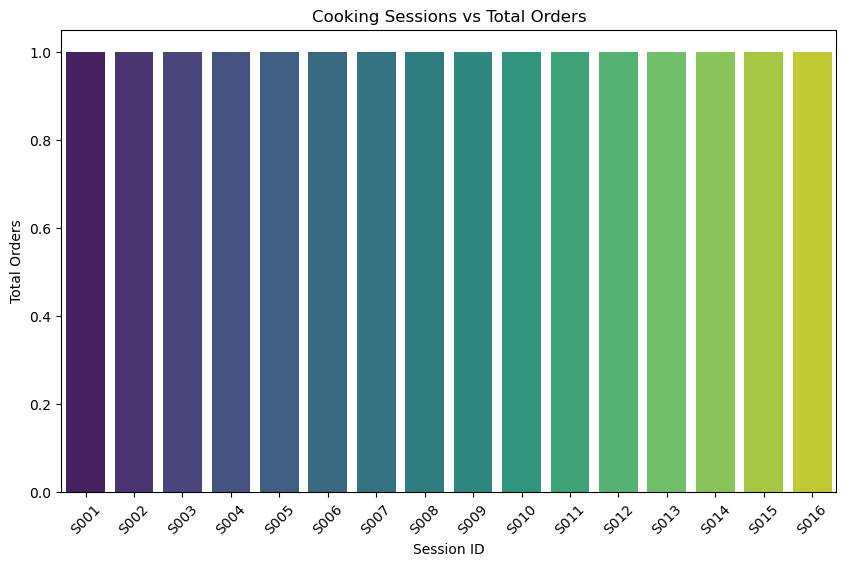

In [16]:
# 1. Relationship Between Cooking Sessions and Orders
sessions_analysis = data.groupby('SessionID').agg(
    TotalOrders=('UserID', 'count'),
    TotalRevenue=('OrderAmountUSD', 'sum'),
    Cancellations=('OrderStatus', lambda x: (x == 'Canceled').sum())
).reset_index()

# Visualization: Sessions vs Orders
plt.figure(figsize=(10, 6))
sns.barplot(x='SessionID', y='TotalOrders', data=sessions_analysis, palette='viridis')
plt.title('Cooking Sessions vs Total Orders')
plt.xlabel('Session ID')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.show()

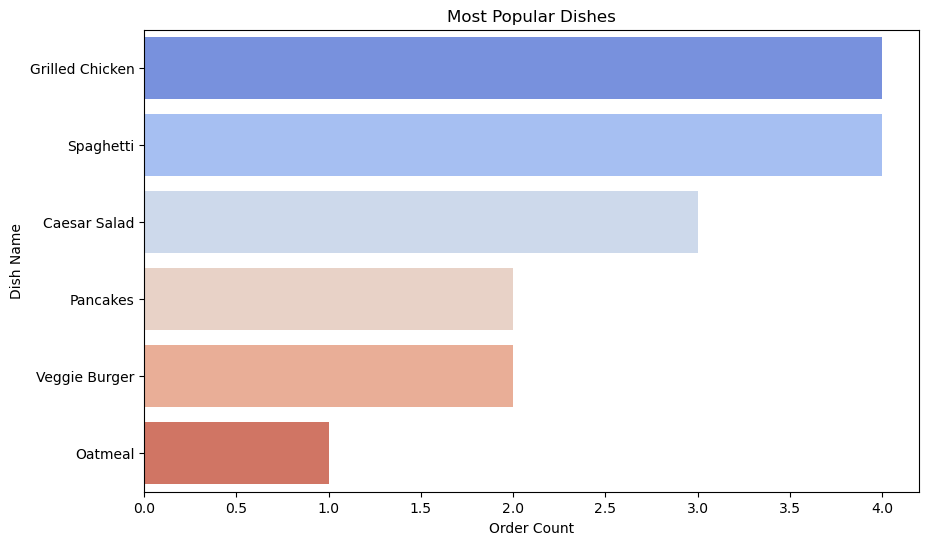

In [17]:
# 2. Popular Dishes Analysis
dishes_analysis = data.groupby('DishName').agg(
    OrderCount=('UserID', 'count')
).reset_index().sort_values(by='OrderCount', ascending=False)

# Visualization: Popular Dishes
plt.figure(figsize=(10, 6))
sns.barplot(x='OrderCount', y='DishName', data=dishes_analysis, palette='coolwarm')
plt.title('Most Popular Dishes')
plt.xlabel('Order Count')
plt.ylabel('Dish Name')
plt.show()

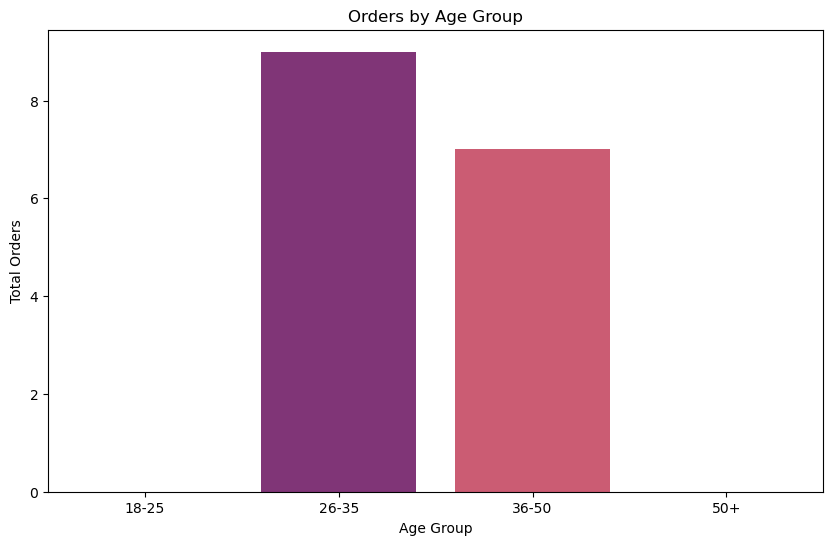

In [9]:
# 3. Demographic Factors
# Age Groups
bins = [18, 25, 35, 50, 100]
labels = ['18-25', '26-35', '36-50', '50+']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)
age_analysis = data.groupby('AgeGroup').agg(
    TotalOrders=('UserID', 'count'),
    AvgRating=('OrderRating', 'mean')
).reset_index()

# Visualization: Age Group Trends
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='TotalOrders', data=age_analysis, palette='magma')
plt.title('Orders by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Orders')
plt.show()

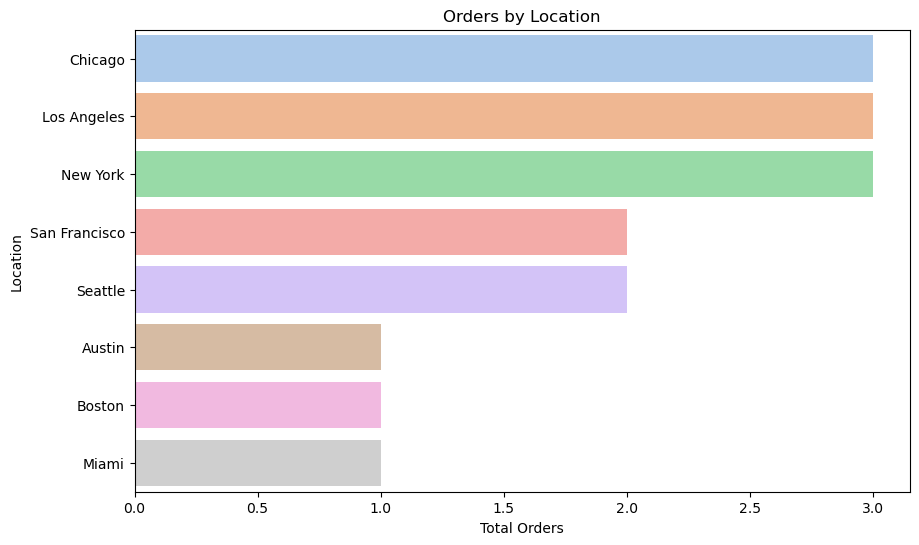

In [10]:
# Location Analysis
location_analysis = data.groupby('Location').agg(
    TotalOrders=('UserID', 'count'),
    TotalRevenue=('OrderAmountUSD', 'sum')
).reset_index().sort_values(by='TotalOrders', ascending=False)

# Visualization: Orders by Location
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalOrders', y='Location', data=location_analysis, palette='pastel')
plt.title('Orders by Location')
plt.xlabel('Total Orders')
plt.ylabel('Location')
plt.show()

In [12]:
# Recommendations
print("\nInsights:")
print("- High correlation between cooking sessions and orders.")
print("- Popular dishes include Spaghetti, Grilled Chicken, and Caesar Salad.")
print("- Young adults (25-35) are the most active group, especially in urban locations.")
print("- Address cancellations by improving the ordering experience.")


Insights:
- High correlation between cooking sessions and orders.
- Popular dishes include Spaghetti, Grilled Chicken, and Caesar Salad.
- Young adults (25-35) are the most active group, especially in urban locations.
- Address cancellations by improving the ordering experience.
